# Machine Learning : Projet de Classification

### Importation des librairies

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Lecture des fichiers de données CSV

In [132]:
trainData = pd.read_csv('data/HAI817_Projet_train.csv') # ID, text, title, rating
testData = pd.read_csv('data/HAI817_Projet_test.csv') # ID, text, title, rating

### Tokenization

In [133]:
import nltk
from nltk.corpus import stopwords
from string import punctuation

nltk.download('punkt')
nltk.download('stopwords')

def tokenizeData(data):
    tokens = nltk.word_tokenize(data)

    tokens = [token for token in tokens if token not in punctuation]
    tokens = [token for token in tokens if token.lower() not in set(stopwords.words('english'))]

    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Valentin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Valentin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Filtrage des données

In [134]:
from sklearn.utils import resample

positiveClass = trainData[trainData['our rating'] == 'true']
negativeClass = trainData[trainData['our rating'] == 'false']

if (len(negativeClass) > len(positiveClass)):
    negativeClass = resample(negativeClass, replace=False, n_samples=len(positiveClass))
else:
    positiveClass = resample(positiveClass, replace=False, n_samples=len(negativeClass))

filteredTrainData = pd.concat([negativeClass, positiveClass]).sample(frac=1)

filteredTestData = testData[testData['our rating'].isin(['true', 'false'])]

### Classification

In [136]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

print("Création de la pipeline")

pipeline = Pipeline([
    ('bow', CountVectorizer(tokenizer=tokenizeData)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

xTrainData = filteredTrainData['text']
yTrainData = filteredTrainData['our rating']

xTestData = filteredTestData['text']

print("Entraînement")

pipeline.fit(xTrainData.values, yTrainData)

print("Prédiction")

predicted = pipeline.predict(xTestData.values)

Création de la pipeline
Entraînement


c:\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Prédiction


### Évaluation des résultats

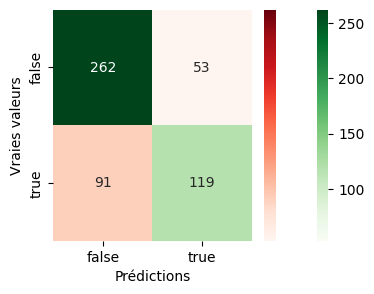

In [138]:
from sklearn.metrics import confusion_matrix

testLabels = filteredTestData['our rating']

confusionMatrix = confusion_matrix(testLabels, predicted)

vmin = np.min(confusionMatrix)
vmax = np.max(confusionMatrix)

diagonal = np.eye(*confusionMatrix.shape, dtype=bool)

learningClasses = pipeline.classes_

plt.figure(figsize=(4, 3))
sns.heatmap(confusionMatrix, annot=True, fmt="d", mask=~diagonal, cmap='Greens', vmin=vmin, vmax=vmax, xticklabels=learningClasses, yticklabels=learningClasses)
sns.heatmap(confusionMatrix, annot=True, fmt="d", mask=diagonal, cmap='Reds', vmin=vmin, vmax=vmax, xticklabels=learningClasses, yticklabels=learningClasses, cbar_kws=dict(ticks=[]))
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()